# Feature Analysis and Modeling

# 20Ciphers_Newsgroups

### Overview

Source : https://www.kaggle.com/competitions/20-newsgroups-ciphertext-challenge/overview <br>
original dataset :http://qwone.com/~jason/20Newsgroups/

* Firstly, it’s all about encryption which means converting readable text to unreadable text.
* The Ciphertext challenge is to find the unreadable text belongs to which group?
* Now what are all the groups? There are 20News groups (20 classes) dataset having a 20000 newsgroup documents.
* This Problem is a multiclass classification problem.
* This problem is not about decrypting the given ciphertext

### Problem Statement
classification of ciphertexts are belongs to respective Newsgroups (classes)

20ciphers_Newsgroups consists of ciphertexts <br>

train_dataset consists of :<br> 
* Ciphertext : An encrypted text of a readable text <br>
* ID         : A unique ID for each ciphertext <br>
* Target     : 20 news groups are present, each ciphertext are belongs to one of the news groups <br>

Test_dataset consists of : <br>
* Ciphertext : An encrypted text of a readable text <br>
* ID         : A unique ID for each ciphertext <br>                               

We need to classify the Target group for given test_dataset ciphertexts.

### what is the use?
* By just using ML classification techniques we are able to classify Newsgroups without using any cryptographh algorithms
* we don't need to use cryptography algorithms to predict the groups ,then How will we classify?
* Machine learning Algorithms are using in Every Domain in real world. so, yes in crytpgraphy also we can use ML classification   technique's like by converting ciphertext into vectors using tfidf ,word2vec and also use some Basic techniques for Feature   
  Engineering.




In [12]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.preprocessing import Normalizer
from scipy.sparse import hstack
import warnings
warnings.filterwarnings('ignore')

In [13]:
import pandas as pd
df_train= pd.read_csv("FE_traindata.csv") # reading the train feature engineering csv file
df_test = pd.read_csv("FE_testdata.csv") # reading the test feature engineering csv file

In [14]:
df_train.head(5)

,ciphertext,Id,target,length,len_of_digits,special_characters,small_case,upper_case,no_of_sentences,per_length,per_len_of_digits,per_no_of_sentences,no_of_words,log_value
0,W)(7yT7h8;Hv\nlTcH;hHhNW)%HhMNPcHNG_Cy^PvMBMy...,ID_48096b7a9,12,1268,95,214,467,326,52,22.518203,1.687089,0.010764,82,6.146329
1,W)(7yqv(H3cl-iNHv cNMrcNv3y^](H\ny\tNyc/syPc...,ID_a2d6e55f4,2,1053,65,153,468,242,37,18.700053,1.154324,0.007659,53,6.148468
2,W)(7yqM()qMl7;HTvM)N\n()8N%hNc8syPcu4MhvyO(H...,ID_9dde342f6,11,491,49,99,166,127,19,8.719588,0.870183,0.003933,38,5.111988
3,W)(7yH=j0j?&Il MHT(HNhhN33cNMrcy^\%7MTyX(cq1%...,ID_b637c2642,16,946,69,164,331,233,49,16.799858,1.225360,0.010143,71,5.802118
4,W)(7y8()MHM8lH7v;Nh(7y^q%)\ny8()MHM8/syPcu4Mh...,ID_51b0f15e7,3,2775,224,593,1001,578,110,49.280767,3.977979,0.022770,167,6.908755


In [15]:
#  !pip install pingouin
#  import pingouin as pg

In [16]:
# pg.anova(dv='target',between='no_of_sentences',data = df, detailed=True)

### Feature Analysis of varaince(Anova)
* To do the anova test I referred this youtube video https://www.youtube.com/watch?v=_X45N7ERtY4&list=LL&index=4
* Anova test will tells us how important your feature on target class based on the groups of variance of your feature
* if p value is less than 0.05 then your feature is good else reject

In [17]:
import statsmodels.api as sm

In [18]:
from statsmodels.formula.api import ols

In [19]:
model = ols('target ~ length',data = df_train).fit()

In [20]:
p = sm.stats.anova_lm(model,typ=2)
p

,sum_sq,df,F,PR(>F)
length,754.140686,1.0,24.708893,6.865130e-07
Residual,171772.315619,5628.0,NaN,NaN


In [21]:
model1 = ols('target ~ len_of_digits',data = df_train).fit()
p1 = sm.stats.anova_lm(model1,typ=2)
p1

,sum_sq,df,F,PR(>F)
len_of_digits,640.605157,1.0,20.975117,0.000005
Residual,171885.851149,5628.0,NaN,NaN


In [22]:
model2 = ols('target ~ special_characters',data = df_train).fit()
p2 = sm.stats.anova_lm(model2,typ=2)
p2

,sum_sq,df,F,PR(>F)
special_characters,534.757532,1.0,17.498608,0.000029
Residual,171991.698773,5628.0,NaN,NaN


In [23]:
model3 = ols('target ~ small_case',data = df_train).fit()
p3 = sm.stats.anova_lm(model3,typ=2)
p3

,sum_sq,df,F,PR(>F)
small_case,1535.228573,1.0,50.530466,1.319154e-12
Residual,170991.227733,5628.0,NaN,NaN


In [24]:
model4 = ols('target ~ upper_case',data = df_train).fit()
p4 = sm.stats.anova_lm(model4,typ=2)
p4

,sum_sq,df,F,PR(>F)
upper_case,757.523149,1.0,24.820206,6.481537e-07
Residual,171768.933156,5628.0,NaN,NaN


In [25]:
model5 = ols('target ~ no_of_sentences',data = df_train).fit()
p5 = sm.stats.anova_lm(model5,typ=1)
p5

,df,sum_sq,mean_sq,F,PR(>F)
no_of_sentences,1.0,2941.206017,2941.206017,97.609358,7.810378e-23
Residual,5628.0,169585.250288,30.132418,NaN,NaN


In [26]:
model6 = ols('target ~ no_of_words',data = df_train).fit()
p6 = sm.stats.anova_lm(model6,typ=2)
p6

,sum_sq,df,F,PR(>F)
no_of_words,2761.600308,1.0,91.551849,1.583821e-21
Residual,169764.855997,5628.0,NaN,NaN


In [27]:
import numpy as np
df_train['log_special'] = df_train['special_characters'].apply(lambda x : np.log(x))

In [28]:
model7 = ols('target ~ log_special',data = df_train).fit()
p7 = sm.stats.anova_lm(model7,typ=2)
p7

,sum_sq,df,F,PR(>F)
log_special,6959.545794,1.0,236.570965,2.521592e-52
Residual,165566.910511,5628.0,NaN,NaN


### The p value of all our features is less than 0.05 so our features are good to use

#### lets try to check how many optimal cluster we will get by using these features

* Applying K-means algorithm

In [29]:
# clu_data = df_train.drop(['Id','target'],axis=1)
# clu_data.head(3)

### spliting a train data
* To test the F1_score we should need a test data but the dataset we have doesn't has a target class so we are spliting our train data

In [30]:
from sklearn.model_selection import train_test_split

y = df_train['target'].values
x = df_train.drop(['target'],axis=1)
x_train1 ,x_test1,y_train1,y_test1 = train_test_split(x,y,test_size=0.15,stratify=y)
print(x_train1.shape,y_train1.shape)
print(x_test1.shape,y_test1.shape)

(4785, 14) (4785,)
(845, 14) (845,)


#### Encoding ciphertex : Tfidfvectorizer, Bag_of_words

In [66]:
tfidf = TfidfVectorizer(min_df = 10,ngram_range=(1,4),max_features=20000)
tfidf.fit(x_train1['ciphertext'].values)

x_tr_tfidf_cipher    = tfidf.transform(x_train1['ciphertext'].values)
x_test1_tfidf_cipher = tfidf.transform(x_test1['ciphertext'].values)
x_te_tfidf_cipher    = tfidf.transform(df_test['ciphertext'].values)
print(x_tr_tfidf_cipher.shape,x_test1_tfidf_cipher.shape,x_te_tfidf_cipher.shape)
############ count vectorizer

bow = CountVectorizer(min_df =10 ,ngram_range=(1,4), max_features=20000)
bow.fit(x_train1['ciphertext'].values)

x_tr_bow_cipher      = bow.transform(x_train1['ciphertext'].values)
x_test1_bow_cipher   = bow.transform(x_test1['ciphertext'].values)
x_te_bow_cipher      = bow.transform(df_test['ciphertext'].values)
print(x_tr_bow_cipher.shape,x_test1_bow_cipher.shape,x_te_bow_cipher.shape)


(4785, 20000) (845, 20000) (13142, 20000)
(4785, 20000) (845, 20000) (13142, 20000)


### Encoding numerical features

In [67]:
def numerical_norm(col,normalizer):
  train = normalizer.fit_transform(x_train1[col].values.reshape(1,-1)).reshape(-1,1)
  test  = normalizer.fit_transform(df_test[col].values.reshape(1,-1)).reshape(-1,1)
  test1 = normalizer.fit_transform(x_test1[col].values.reshape(1,-1)).reshape(-1,1) # splited test data

  return train,test,test1

normalizer = Normalizer() #Normalizer
x_tr_length ,x_te_length ,x_test_length           = numerical_norm('length',normalizer)
x_tr_len_digits,x_te_len_digits,x_test_len_digits = numerical_norm('len_of_digits',normalizer)
x_tr_spec_char ,x_te_spec_char ,x_test_spec_char  = numerical_norm('special_characters',normalizer)
x_tr_upper_case,x_te_upper_case,x_test_upper_case = numerical_norm('upper_case',normalizer)
x_tr_small_case,x_te_small_case,x_test_small_case = numerical_norm('small_case',normalizer)
x_tr_sentences ,x_te_sentences ,x_test_sentences  = numerical_norm('no_of_sentences',normalizer)
x_tr_words     ,x_te_words     ,x_test_words      = numerical_norm('no_of_words',normalizer)
x_tr_per_length,x_te_per_length,x_test_per_length = numerical_norm('per_length',normalizer)
x_tr_per_lod   ,x_te_per_lod   ,x_test_per_lod    = numerical_norm('per_len_of_digits',normalizer)
x_tr_per_sent , x_te_per_sent  ,x_test_per_sent   = numerical_norm('per_no_of_sentences',normalizer)

In [68]:
#combining all the features

x_tr   = hstack((x_tr_bow_cipher,x_tr_tfidf_cipher,x_tr_length,x_tr_len_digits,x_tr_spec_char,x_tr_upper_case,x_tr_small_case,x_tr_sentences,x_tr_words,x_tr_per_length,
                x_tr_per_lod,x_tr_per_sent)).tocsr()
x_te   = hstack((x_te_bow_cipher,x_te_tfidf_cipher,x_te_length,x_te_len_digits,x_te_spec_char,x_te_upper_case,x_te_small_case,x_te_sentences,x_te_words,x_te_per_length,
                x_te_per_lod,x_te_per_sent)).tocsr()
x_test = hstack((x_test1_bow_cipher,x_test1_tfidf_cipher,x_test_length,x_test_len_digits,x_test_spec_char,x_test_upper_case,x_test_small_case,x_test_sentences,x_test_words,x_test_per_length,
                x_test_per_lod,x_test_per_sent)).tocsr()


## K_means clustering

In [34]:
# https://www.analyticsvidhya.com/blog/2021/05/k-mean-getting-the-optimal-number-of-clusters/#:~:text=1.-,Elbow%20Curve%20Method,-The%20elbow%20method
# referred above page to use elbow method to get optimal number of clusters
from sklearn.cluster import KMeans

sum_sqr_dist = []
k = [5,10,15,20,30,40,50,60]
for i in k:
  kmeans = KMeans(n_clusters=i)
  kmeans.fit(x_tr)
  sum_sqr_dist.append(kmeans.inertia_)
  

Text(0.5, 1.0, 'get optimal_number_of_clusters')

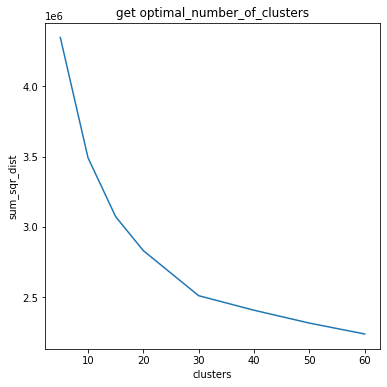

In [35]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6,6))
plt.plot(k,sum_sqr_dist)
plt.xlabel('clusters')
plt.ylabel('sum_sqr_dist')
plt.title('get optimal_number_of_clusters')

* sum_of_squared_distance was suddenly falling from k=30

In [36]:
optimal_number_clusters = 30

In [37]:
kmeans1 = KMeans(n_clusters=optimal_number_clusters) #apply k-means 
kmeans1.fit(x_tr)

KMeans(n_clusters=30)

In [38]:
# using clustering Assigment
from sklearn.manifold import TSNE 
tsne = TSNE

transform = tsne(n_components=2,perplexity=50) 
x_tr_2d   = transform.fit_transform(x_tr)  #applt tsne (dimensionality redcution)

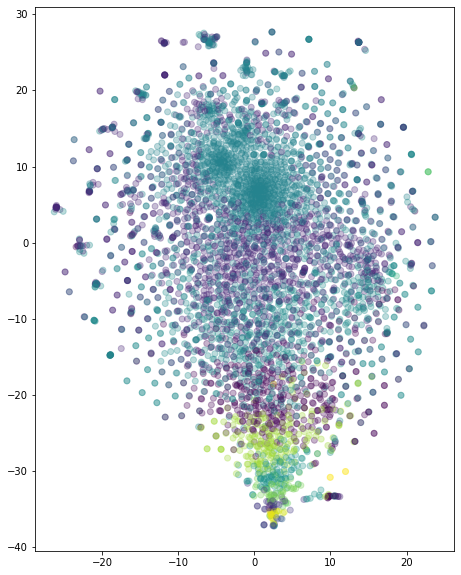

In [39]:
plt.figure(figsize=(15,10))
plt.axes().set(aspect = "equal")
plt.scatter(x_tr_2d[:,0],
            x_tr_2d[:,1],
            c=kmeans1.labels_.astype(float),alpha=0.3)
plt.show()

In [40]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

### apply logistic regression

In [41]:
#logistic regression
model1 = LogisticRegression(class_weight='balanced',multi_class='auto',n_jobs=-1)
model1.fit(x_tr,y_train1)
y_test_pred1 = model1.predict(x_test)
f1score_logr = f1_score(y_test_pred1,y_test1,average='macro')
print(f1score_logr)

0.6703979666283401


### Apply NaiveBayes

* finding the best hyperparameter alpha using gridsearchcv

In [69]:
#hyperparameter tuning for Naive Bayes
NB      = MultinomialNB()
param_grid ={'alpha' : [0.00001,0.0005,0.0001,0.005,0.001,0.05,0.01,0.5,0.1,1,5,10,50,100]} # sample hyperparameters
gridscv    = GridSearchCV(NB,param_grid,cv=3)
gridscv.fit(x_tr,y_train1)

GridSearchCV(cv=3, estimator=MultinomialNB(),
             param_grid={'alpha': [1e-05, 0.0005, 0.0001, 0.005, 0.001, 0.05,
                                   0.01, 0.5, 0.1, 1, 5, 10, 50, 100]})

In [70]:
print(gridscv.best_params_)

{'alpha': 0.1}


In [71]:
model2 = MultinomialNB(alpha=0.1) #naivebayes with best hyperparameter
model2.fit(x_tr,y_train1) 
y_test_pred2 = model2.predict(x_test)
f1score_nb = f1_score(y_test_pred2,y_test1,average='macro')
print(f1score_nb)

0.6987641147801491


In [45]:
# from sklearn.metrics import confusion_matrix
# import seaborn as sns
# conf_matrix = confusion_matrix(y_test1,y_test_pred2)
# plt.figure(figsize=(15,15))
# sns.heatmap(conf_matrix,annot=True,fmt="d",cmap="Blues")

### Apply K-nearest neigbours

In [46]:
n_neig = [5,10,15,30,50,100]


In [47]:
# hyperparameter tuning for KNN
knn = KNeighborsClassifier()
param_grid1 = {'n_neighbors':n_neig}
gridscv_knn = GridSearchCV(knn,param_grid1,cv=3)
gridscv_knn.fit(x_tr,y_train1)

GridSearchCV(cv=3, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [5, 10, 15, 30, 50, 100]})

In [48]:
gridscv_knn.best_params_

{'n_neighbors': 5}

In [49]:
model3 = KNeighborsClassifier(n_neighbors=5,weights='distance') # knn classifier with best hyperparameter
model3.fit(x_tr,y_train1)
y_test_pred3 = model3.predict(x_test)
f1score_knn = f1_score(y_test_pred3,y_test1,average='macro')
print(f1score_knn)

0.35101660343956115


### apply support vector machines

In [50]:
# hyper parameter tuning for SVM
svm = SVC()
param_grid = {'C':[0.1,1,10,50,100]} # sample hyperparameters
gridscv_svm = GridSearchCV(svm,param_grid,cv=3,n_jobs=-1) # gridsearch
gridscv_svm.fit(x_tr,y_train1)

GridSearchCV(cv=3, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 50, 100]})

In [51]:
gridscv_svm.best_params_

{'C': 10}

In [52]:
model4 = SVC(C=10) #applying SVC with best hyperparameter
model4.fit(x_tr,y_train1)
y_test_pred4 = model4.predict(x_test)
f1score_svc = f1_score(y_test_pred4,y_test1,average='macro')

In [53]:
print(f1score_svc)

0.5872655352076552


### Apply Decision Tree

In [54]:
# Hyperparameter tuning for decisiontree classifier
from sklearn.tree import DecisionTreeClassifier

dt =DecisionTreeClassifier(class_weight='balanced')
param_grid = {'max_depth':[1,5,10,50,100,150,200],'min_samples_split':[5,10,100,500]} #sample hyperparameters to get best
gridscv_dt = GridSearchCV(dt,param_grid,cv=3)
gridscv_dt.fit(x_tr,y_train1)
gridscv_dt.best_params_

{'max_depth': 200, 'min_samples_split': 100}

In [55]:
model5 = DecisionTreeClassifier(class_weight='balanced',max_depth=200,min_samples_split=100) #decision tree classifier with best hyperparameters
model5.fit(x_tr,y_train1)
y_test_pred5 = model5.predict(x_test)
f1score_dt =f1_score(y_test_pred5,y_test1,average='macro')
print(f1score_dt)

0.35235567288544223


### random forest

In [56]:
from sklearn.ensemble import RandomForestClassifier

# Hyperparameter tuning for random forest classifier
RFC = RandomForestClassifier(class_weight='balanced',bootstrap=True,oob_score=True)
param_grid = {'n_estimators':[10,20,40,50,100],'max_depth':[1,5,10,50,100,150,200],'min_samples_split':[5,10,100,500]} #sample hyperparameters
gridscv_rfc = GridSearchCV(RFC,param_grid,cv=3)
gridscv_rfc.fit(x_tr,y_train1)
gridscv_rfc.best_params_ 

{'max_depth': 200, 'min_samples_split': 100, 'n_estimators': 100}

In [57]:
model6 = RandomForestClassifier(n_estimators=100,max_depth=150,min_samples_split=10,class_weight='balanced',bootstrap=True) #random forest classifier with best hyperparameters
model6.fit(x_tr,y_train1)
y_test_pred6 = model6.predict(x_test)
f1score_xgb = f1_score(y_test_pred6,y_test1,average='macro')
f1score_xgb

0.5984295209929013

In [59]:
from prettytable import PrettyTable , ALL

table = PrettyTable(["ModelNo.","Model","Hyperparameters","Macro_F1_score"])
table.add_row(['1','LogisticRegression','','0.670'])
table.add_row(['2','naive_bayes','alpha : 0.1','0.698'])
table.add_row(['3','KNearestNeigbors','n_neighbors : 5','0.351'])
table.add_row(['4','SVM','C : 50','0.587'])
table.add_row(['5','DecisionTree','max_depth: 200 ,min_samples_split: 100','0.352'])
table.add_row(['6','RandomForest','max_depth: 0.1, min_samples_split:10, n_estimators: 100','0.598'])
table.hrules = ALL


print(table)


+----------+--------------------+---------------------------------------------------------+----------------+
| ModelNo. |       Model        |                     Hyperparameters                     | Macro_F1_score |
+----------+--------------------+---------------------------------------------------------+----------------+
|    1     | LogisticRegression |                                                         |     0.670      |
+----------+--------------------+---------------------------------------------------------+----------------+
|    2     |    naive_bayes     |                       alpha : 0.1                       |     0.698      |
+----------+--------------------+---------------------------------------------------------+----------------+
|    3     |  KNearestNeigbors  |                     n_neighbors : 5                     |     0.351      |
+----------+--------------------+---------------------------------------------------------+----------------+
|    4     |       